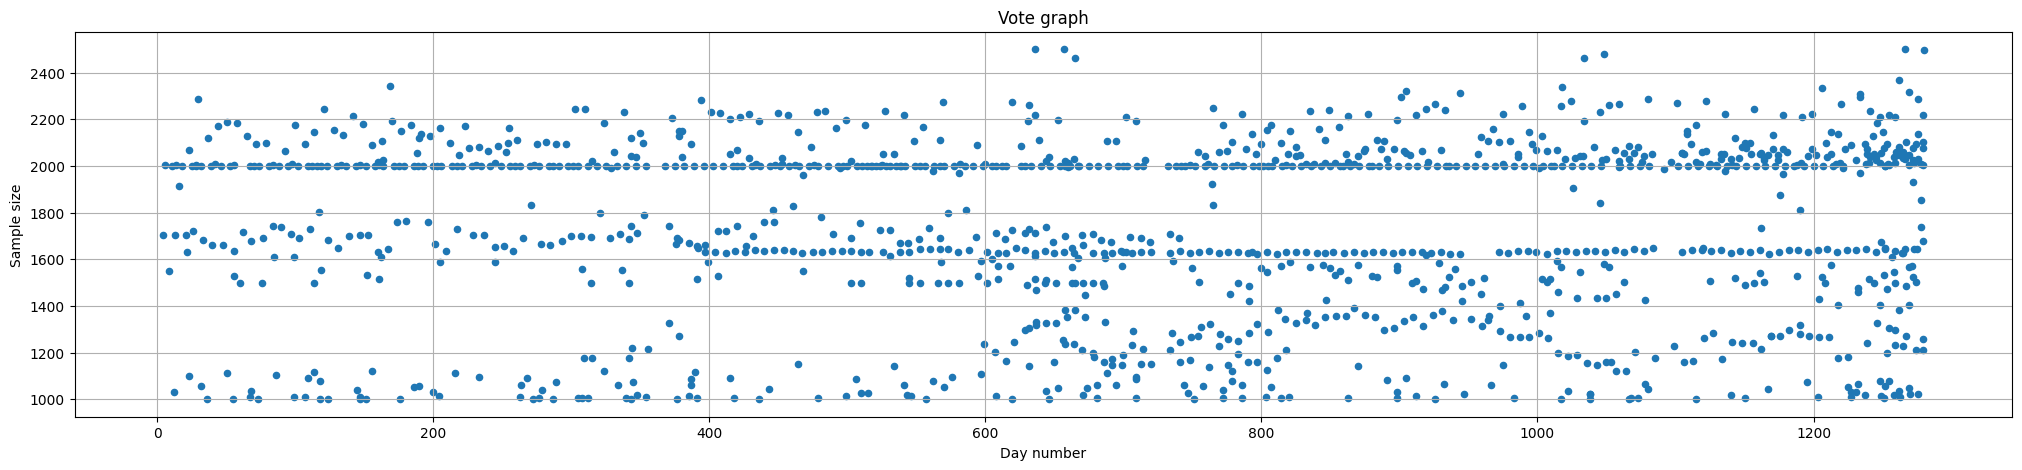

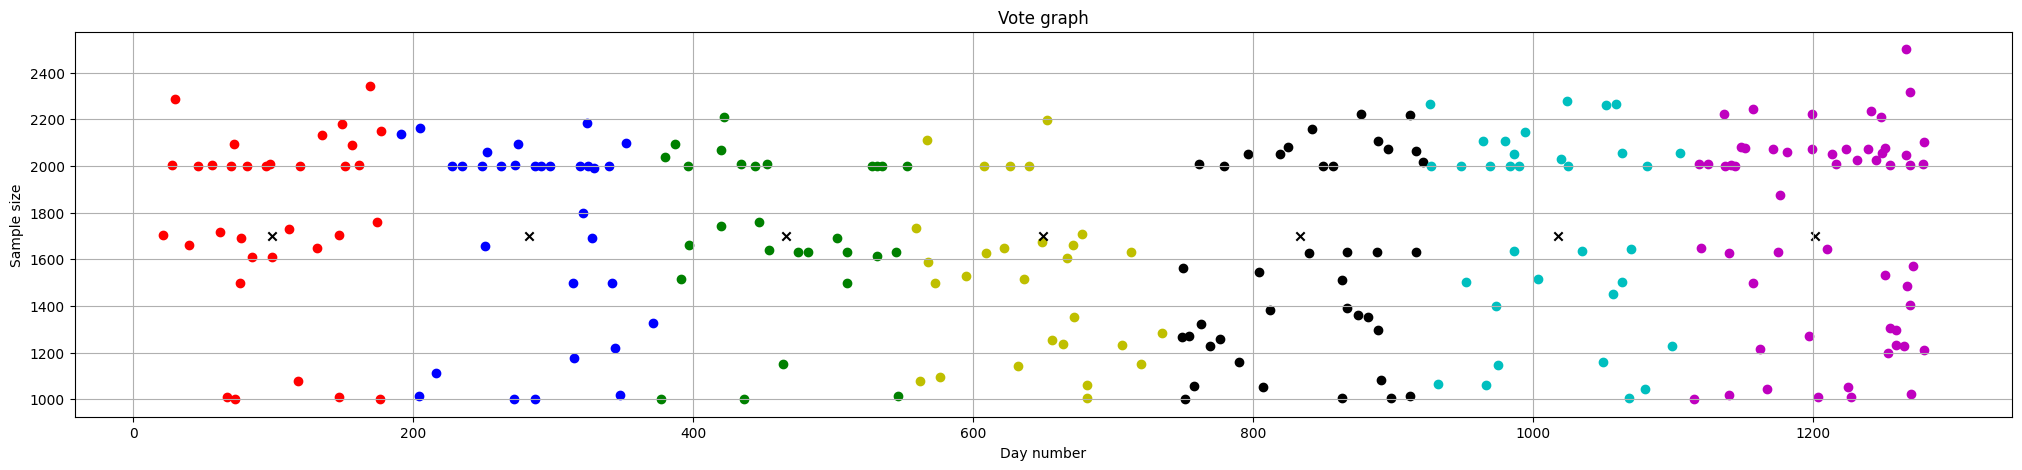

BaseLine Total Distanse: 88953.37418620464


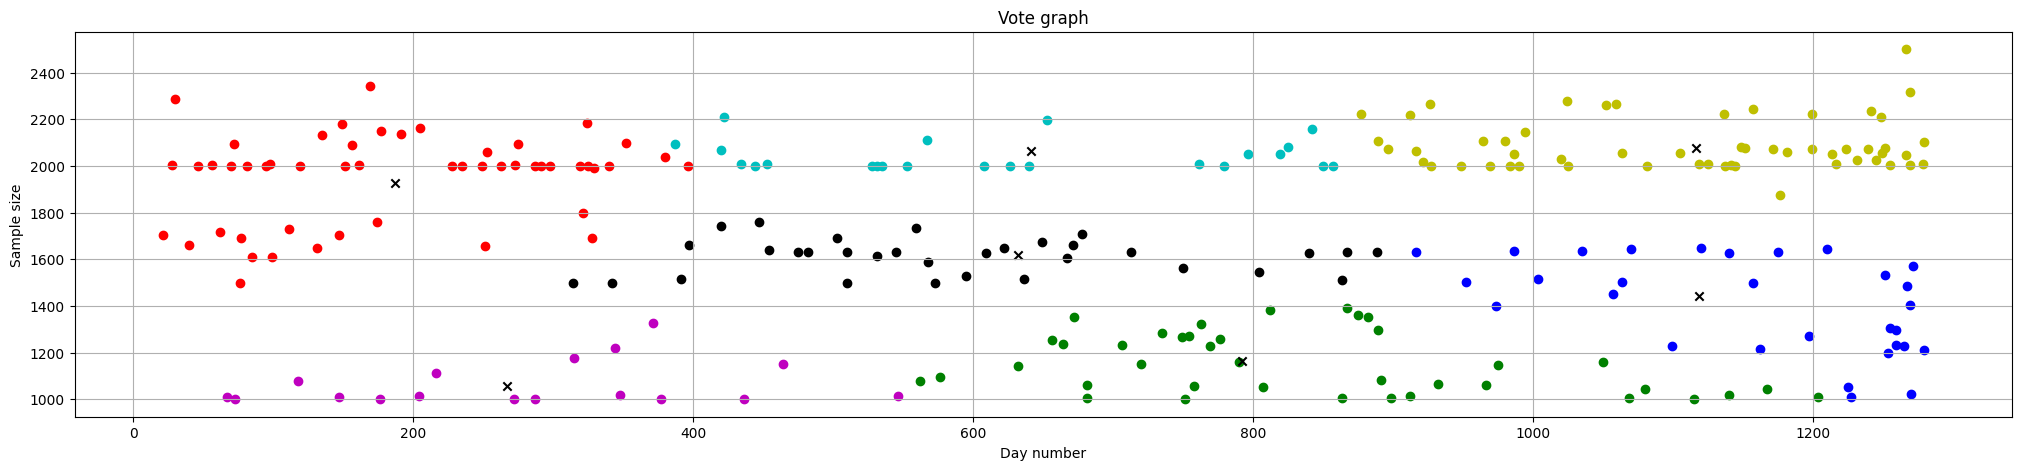

Sklearn Kmeans Distanse: 43829.049524137925


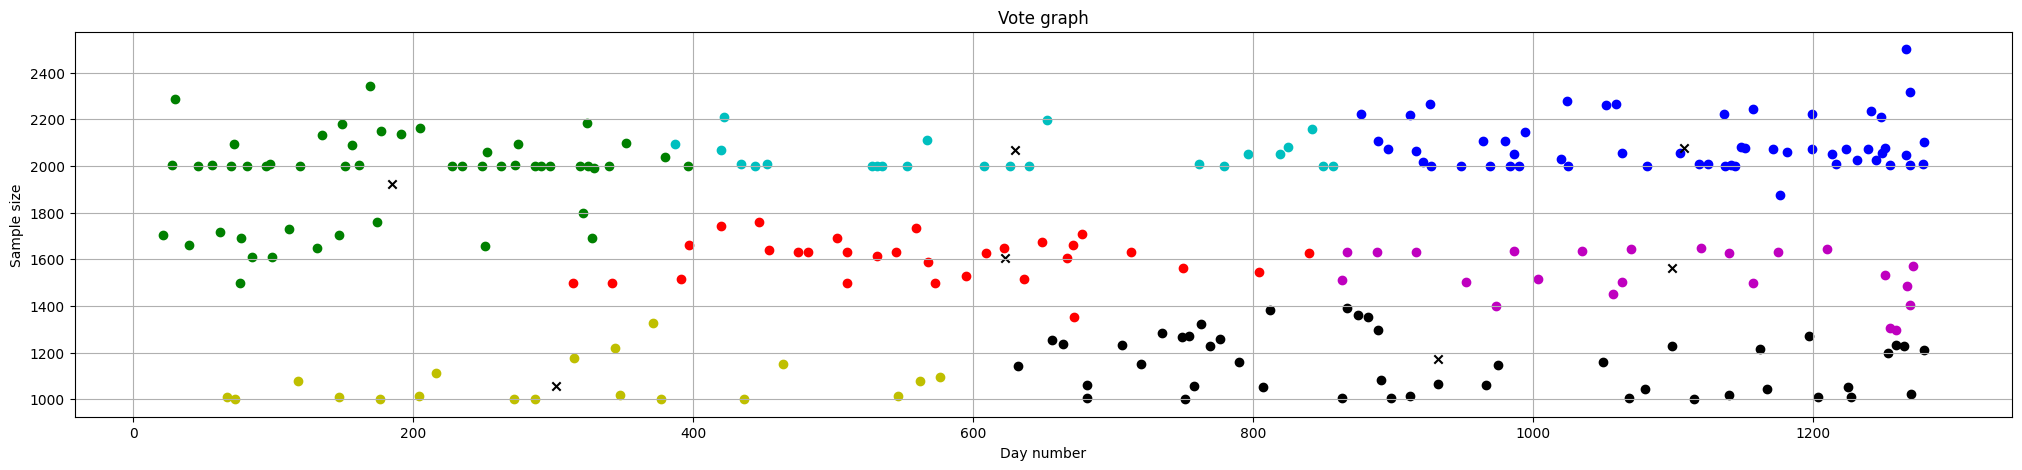

My Kmeans Distanse: 44039.866233996334


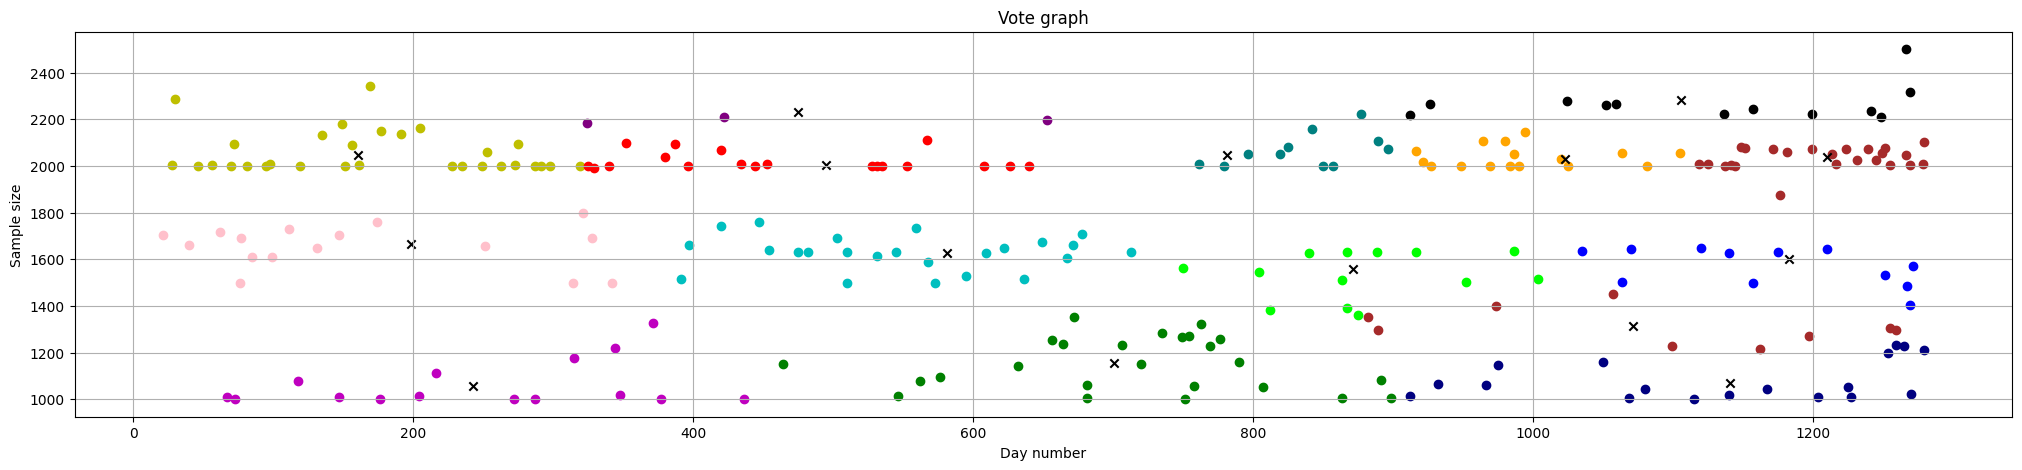

Best Sklearn Kmeans Distanse: 27860.082106620113


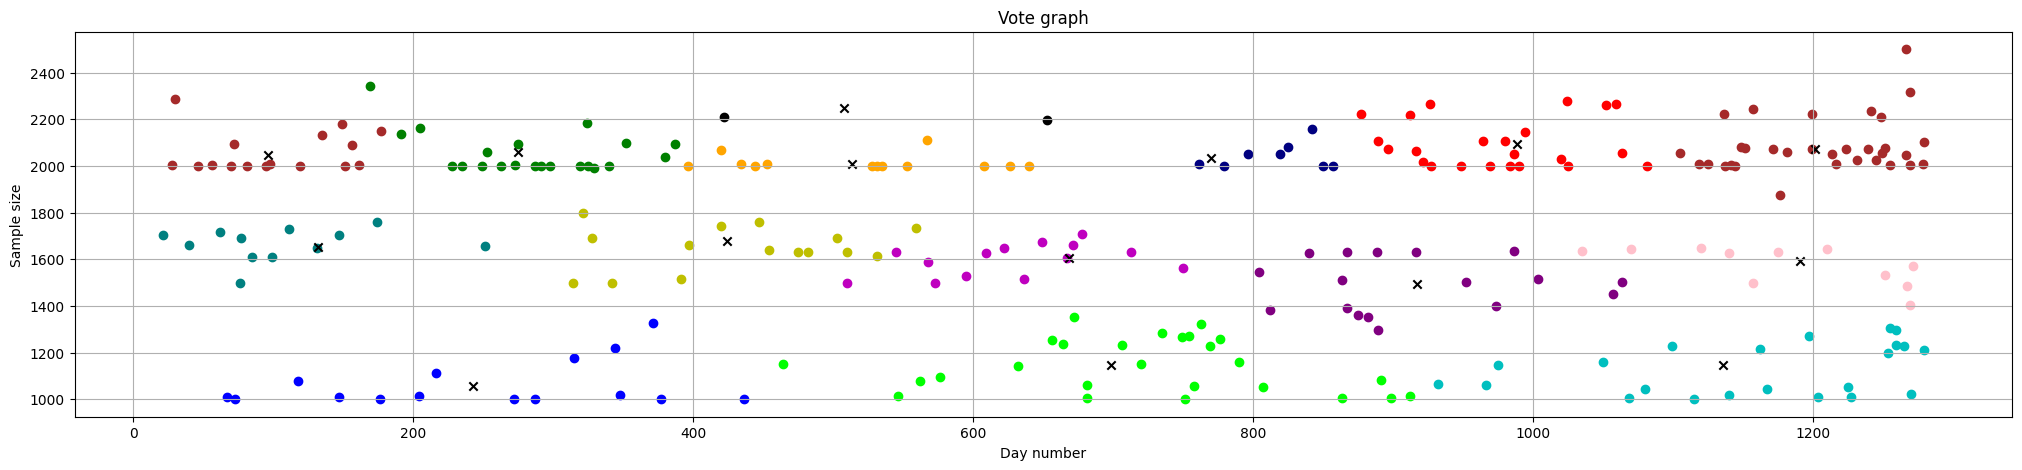

Best My Kmeans Distanse: 27020.561456572887


In [88]:
import re
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)

#BaseLine
def base_line_kmeans(data, n):   
    #Find clister centers
    x = data.values
    x_min, x_max = np.min(x[:, 0]), np.max(x[:, 0])
    step = int((x_max - x_min) / (n + 1) / 2)
    x_cluster_centers = np.linspace(x_min + step, x_max - step, n)
    y_cluster_centers = np.full(n, 1700)
    cluster_centers = np.array(list(zip(x_cluster_centers, y_cluster_centers)))

    #Count distance
    labels = []
    for point in x:
        distances = np.linalg.norm(point - cluster_centers, axis=1)
        labels.append(int(np.argmin(distances)))
    return labels, cluster_centers

def run_sklearn_kmeans(train_data, test_data, n, iters):
    #Get clister centers and distance
    train = train_data.values
    test = test_data.values
    kmeans = KMeans(n_clusters = n, max_iter=iters)
    kmeans.fit(train_data)
    cluster_centers = kmeans.cluster_centers_
    labels_test = kmeans.predict(test_data)
    return labels_test, cluster_centers

class MyKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None

    def fit(self, data): 
        x = data.values
        self.cluster_centers_ = x[np.random.choice(x.shape[0], self.n_clusters, replace=False)]
        #Run some steps to find best cluster centers
        for _ in range(self.max_iter):
            #Choice closer centor to every point
            labels = []
            for point in x:
                distances = [np.linalg.norm(point - center) for center in self.cluster_centers_]
                labels.append(np.argmin(distances))

            #Update claster centers
            new_centers = []
            for i in range(self.n_clusters):
                points_in_cluster = x[np.array(labels) == i]
                if len(points_in_cluster) > 0: #Check for empty cluster
                    new_centers.append(points_in_cluster.mean(axis=0)) #Mid position of all points in one cluster
                else:
                    new_centers.append(self.cluster_centers_[i]) #No changes for empty cluster
            new_centers = np.array(new_centers)

            #Check if new cluster centers like old cluster centers
            if np.all(self.cluster_centers_ == new_centers):
                break #Fast end of iteration (if positions is same)
            self.cluster_centers_ = new_centers #Update cluster centers
        self.labels_ = labels

    def predict(self, data):
        #Predict result on test data by using train cluster centers
        x = data.values
        labels = []
        for point in x:
            distances = [np.linalg.norm(point - center) for center in self.cluster_centers_]
            labels.append(np.argmin(distances))
        return labels

def run_my_kmeans(train_data, test_data, n, iters):
    #Get clister centers and distance
    train = train_data.values
    test = test_data.values
    kmeans = MyKMeans(n_clusters = n, max_iter=iters)
    kmeans.fit(train_data)
    cluster_centers = kmeans.cluster_centers_
    labels_test = kmeans.predict(test_data)
    return labels_test, cluster_centers

def draw(labels, cluster_centers, data):
    #Count total distance
    x = data.values
    total_distance = 0
    for i, point in enumerate(x):
        total_distance += np.linalg.norm(point - cluster_centers[labels[i]])

    #Print and show results
    colors = ['r', 'b', 'g', 'y', 'k', 'c', 'm', 'orange', 'pink', 'brown', 'lime', 'teal', 'navy', 'brown', 'purple']
    plt.figure(figsize=(25, 5))
    for i, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[labels[i] % len(colors)])
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x')
    plt.xlabel('Day number')
    plt.ylabel('Sample size')
    plt.title('Vote graph')
    plt.grid(True)
    plt.show()
    return total_distance
    

#Convert days and months to day number. Period of day will return mid day of this period.
#First day is 2021 1 Jan
def Convert(y, d):
    ans = (int(y) - 2021) * 365  #In this case we haven't full leap years. In this case function will be more simple.
    if (d.find('–') == -1) :
        ans += int(d[:d.find(' ')]) + sum(DaysInYear[:Months.index(d[-3:])])
    elif (d.count(' ') == 1):
        a = int(d[:d.find('–')])
        b = int(d[d.find('–') + 1:d.find(' ')])
        ans += sum(DaysInYear[:Months.index(d[-3:])]) + (a + b) // 2
    else:
        fistMonth = Months.index(d[d.find(' ') + 1: d.find(' ') + 4])
        secondMonth = Months.index(d[-3:])
        a = sum(DaysInYear[:fistMonth]) + int(d[:d.find(' ')])
        b = sum(DaysInYear[:secondMonth]) + int(re.findall(r'\s(\d+)\s', d)[-1])  #Last number in str
        if (fistMonth > secondMonth):  #Case where period starts in one year and finishes in next year
            a -= 365
        ans += (a + b) // 2
        
    #Add extra Feb day in leap year
    if ((y == 2024) and (Months.index(d[-3:]) > 1)):
        ans += 1    
    return ans

#Constants for convert days and months to day number
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DaysInYear = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

#Open created cvs file from lab 1 for modification for comfortable graph view
df = pd.read_csv("fullDF.csv")
df = df.drop(df.columns[0], axis = 1)  #Remove extra id column

dayNumber = []
for year, days in zip(df[df.columns[0]], df[df.columns[1]]):
    dayNumber.append(Convert(year, days))

df = df.drop(df.columns[0], axis = 1)
df = df.drop(df.columns[0], axis = 1) #Remove old columns and insert converted days
df.insert(0, "Day number", dayNumber)

#Swap some rows in DataFrame for order
df = df.sort_values(by=df.columns[0])

#Delete some extra information
df[df.columns[1]] = df[df.columns[1]].str.replace(" \(MRP\)", "", regex=True)
df[df.columns[1]] = df[df.columns[1]].str.replace(r"\[permanent dead link\]", "", regex=True)
df['Client'] = df['Client'].fillna(df['Pollster'])

#Skip extra sample size points
df = df[df["Sample size"] <= 2500]

df.plot(x="Day number", y='Sample size', kind='scatter', figsize=(25, 5))
plt.xlabel('Day number')
plt.ylabel('Sample size')
plt.title('Vote graph')
plt.grid(True)
plt.show()

#Split DataFrame (train 80%, test 20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=77)

#Remove extra rows.
train_df = train_df.drop(columns=['Pollster', 'Client', 'Area', 'Con.', 'Lab.', 'Lib. Dems', 'SNP', 'Green', 'Ref.', 'Others'])
test_df = test_df.drop(columns=['Pollster', 'Client', 'Area', 'Con.', 'Lab.', 'Lib. Dems', 'SNP', 'Green', 'Ref.', 'Others'])

#Run baseline
label, centers = base_line_kmeans(test_df, 7)
print(f'BaseLine Total Distanse: {draw(label, centers, test_df)}')

#Run sklearn kmeans
label, centers = run_sklearn_kmeans(train_df, test_df, 7, 150)
print(f'Sklearn Kmeans Distanse: {draw(label, centers, test_df)}')

#Run my kmeans
label, centers = run_my_kmeans(train_df, test_df, 7, 150)
print(f'My Kmeans Distanse: {draw(label, centers, test_df)}')

#Run sklearn kmeans with more precise parameters from sklearn
label, centers = run_sklearn_kmeans(train_df, test_df, 15, 300)
print(f'Best Sklearn Kmeans Distanse: {draw(label, centers, test_df)}')

#Run my kmeans with more precise parameters from sklearn
label, centers = run_my_kmeans(train_df, test_df, 15, 300)
print(f'Best My Kmeans Distanse: {draw(label, centers, test_df)}')
